In [203]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [204]:

data = pd.read_csv('train.csv')
test_data = pd.read_csv("test.csv")
data.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [205]:
data = data.drop(["Open Date", "City", "Id"], axis=1)
test_data = test_data.drop(["Open Date", "City", "Id"], axis=1)

In [206]:
binarizer = LabelBinarizer()
encoder = LabelEncoder()

data["Type"] = encoder.fit_transform(data["Type"])
data["City Group"] = encoder.fit_transform(data["City Group"])
test_data["Type"] = encoder.fit_transform(test_data["Type"])
test_data["City Group"] = encoder.fit_transform(test_data["City Group"])

corr_matrix = data.corr()

corr_matrix["revenue"].sort_values(ascending=False)

revenue       1.000000
P2            0.191518
P28           0.155534
P6            0.139094
P21           0.097411
P11           0.084247
P22           0.083562
P1            0.070217
P17           0.067137
P7            0.051165
P23           0.045507
P25           0.036365
P4            0.035685
P19           0.027984
P24           0.014222
P20           0.014147
P14           0.006441
P15           0.000742
P26          -0.007650
P27          -0.013680
P37          -0.019051
P3           -0.024613
P5           -0.028191
P33          -0.032426
P18          -0.034537
P16          -0.037997
P31          -0.040418
P35          -0.050156
P9           -0.050352
P36          -0.050534
P12          -0.062193
P32          -0.065857
P30          -0.066203
P34          -0.072343
P10          -0.073220
P8           -0.084215
Type         -0.090532
P13          -0.105085
P29          -0.114846
City Group   -0.237403
Name: revenue, dtype: float64

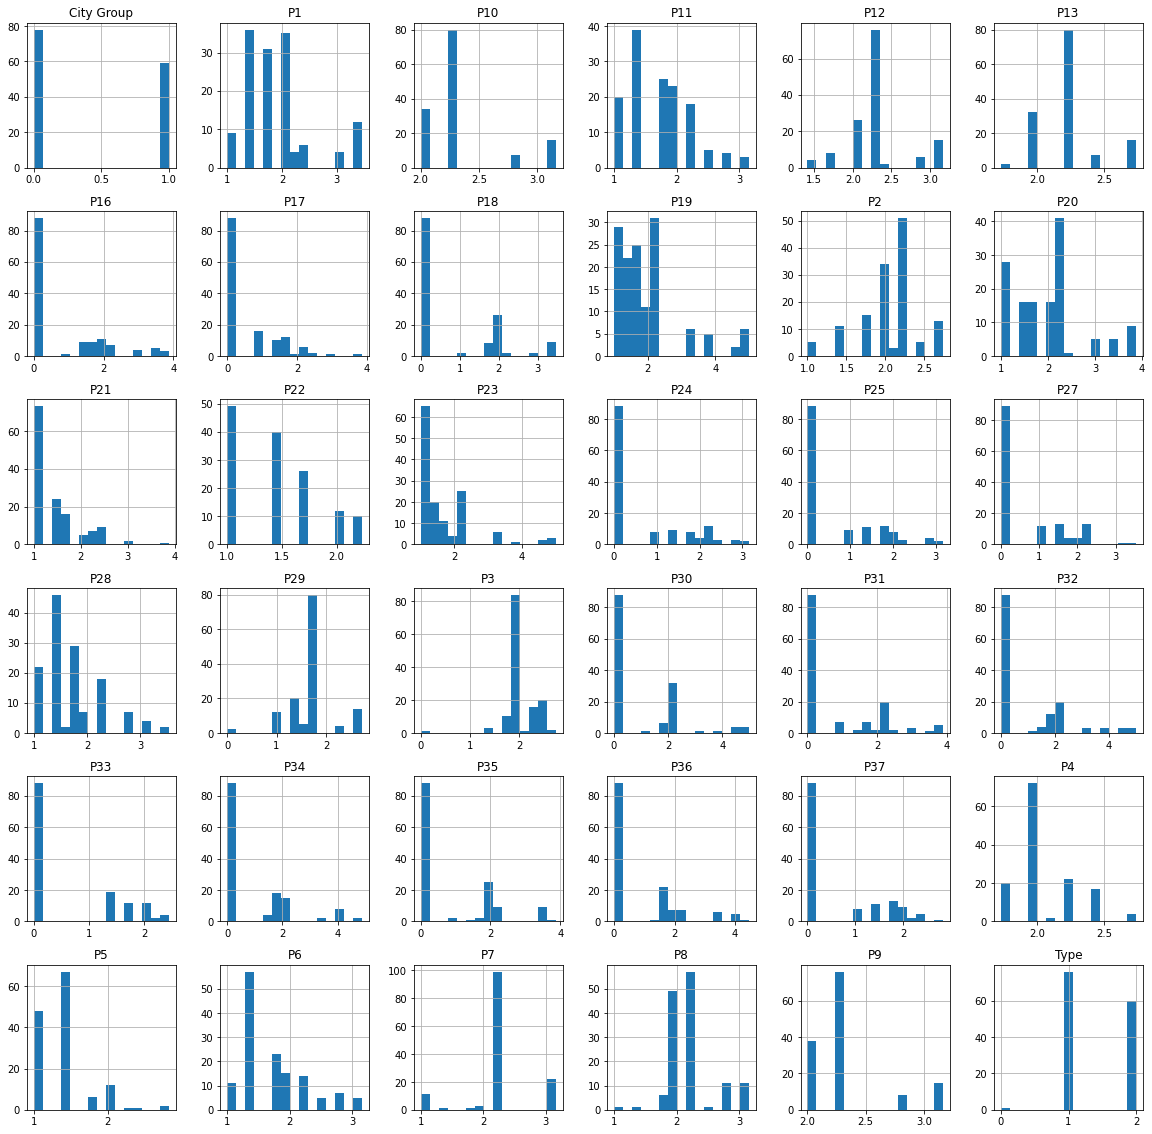

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

scaler = MinMaxScaler()
y_train = data["revenue"]
x_train = data.drop(["revenue","P15","P26", "P14"], axis="columns")
columns = list(x_train.columns)


test_data = test_data.drop(["P15", "P26", "P14"], axis="columns")
test_data_columns = list(test_data.columns)
data = pd.DataFrame(scaler.fit_transform(x_train), columns=columns)
test_data = pd.DataFrame(scaler.fit_transform(test_data), columns=test_data_columns)


for  i in data.columns:
    if i != 'Type':
        x_train[i] = np.sqrt(x_train[i])
        
for  i in test_data.columns:
    if i != 'Type':
        test_data[i] = np.sqrt(test_data[i])
x_train.hist(bins=15, figsize = (20,20))
plt.show()





model = LinearRegression()

model.fit(x_train, y_train)

test_data = pd.DataFrame(scaler.fit_transform(test_data))

predictions = model.predict(test_data)




In [208]:
for i in predictions:
    print(i)



9508118.521048112
7726458.250112353
6323989.740794674
10735217.801915972
11096678.001865424
9971477.20034313
7376357.323702568
9593132.444005512
10065075.23954951
11047021.466115287
12665633.896928035
9834540.549095405
5241706.519749494
9433564.539479407
10375202.18065241
10831175.841742324
6390712.0392972985
8262771.272025984
12492321.26506352
12933967.177170744
11699711.037616028
4795442.996658834
7284510.025386034
6202804.491348584
8828184.03511462
9842236.054376198
8272133.457680855
9917849.413439205
8818756.30679632
9477848.111986002
10394587.18767196
10271365.344720341
5787485.846795996
8801448.816839393
8721346.431898631
10007266.67901272
7256119.922161656
12359967.923694523
6285669.414781129
6081771.426275585
7242983.316296613
8436817.49980145
14490649.599058133
10273433.507470526
13911501.731594669
8455913.884429103
10337239.298843168
6631454.47656744
4153957.242473848
9159592.99817009
6774603.416654695
8719365.886409951
8300709.875546357
8133497.037961496
8750406.726681862
96

4574378.8553931825
5436441.663741336
6472468.624441145
7445013.810367761
6008124.59440721
7009249.96050903
9432026.559379026
10225127.076017778
9067472.801661141
8694064.581843227
4684691.770295464
9977186.054521956
6310262.274668409
9036964.037918495
6241342.5216311
8068032.453409358
8492077.128162222
8172873.397074005
8509422.517321693
8611379.6616247
8358590.318231114
6082033.575188207
8643764.00447773
8711109.130569609
4880434.536778224
6153248.410783469
8434282.406079296
8404901.53096747
9165837.855305813
7402655.63946186
3526538.113273168
3556387.999790568
5603839.756071171
11320568.525098436
7427459.114452233
10356322.224432195
6970644.641411537
12308717.460797373
6507880.907623631
9884392.940392124
5637265.316719134
11490936.72435774
9318411.173008466
11287498.172870193
8103328.122224339
8422484.8490322
8275329.821890514
9391345.36075344
9183101.308174653
8182965.426077228
9171144.545962011
8524194.161487322
8115573.211828689
9483150.17812663
3498141.1184997875
9185253.72466442

6249845.472021569
8660530.780448504
5440724.4675661605
9473487.466969503
8437767.061020479
5545107.505057635
12205404.270792061
12542768.83911711
8698426.609326418
7300143.1951704
9361961.546792176
11208328.634983832
5791477.935223473
11626758.939492954
8129400.249692953
7889016.510596444
8738015.850641819
10562185.514489964
10517195.088947618
8526112.208527658
9388835.446784385
8298957.136548295
9350757.204769673
9161293.342110097
9356429.003052
9927003.82401186
11349028.543032855
8641560.112069182
10736089.988088502
6419025.113451964
7880299.926293587
8511710.571245182
9498174.823199186
12240364.487150358
6186259.001302895
7342807.50381935
8973285.542267125
7292193.452024196
8437655.759746693
9211113.040346773
5821136.13161146
5731535.010057726
7564925.345625986
8251020.313648438
8700080.901128251
7775638.052819737
7992403.514739116
7951629.579292781
7197774.630015627
6230055.721162909
10844425.099509258
7698470.571179578
7864163.35734649
10403631.54632278
6186922.309651887
7371693.9

8889014.493306689
10723281.07383931
6483770.791934385
9193742.532015659
10237873.105758458
6615334.896453141
9529268.162261646
8435501.763427217
9238825.28500088
9009424.149990406
8903097.057390358
6966552.013039999
8669919.8154371
5166388.429698788
7370108.729827384
6873372.367532571
7380869.424658773
7285309.085660679
6906595.834708452
7578031.238359364
10334163.059308931
10193447.813846668
9244485.67854856
8812863.396429844
9081033.324470555
8716327.737000575
5763395.038191603
8553029.359747715
8303306.799991386
8580721.516256101
8140080.595615931
10819554.349852998
9939068.627283255
7043135.637021029
9232352.63309123
9195290.906188374
6942911.435822867
7926546.526728362
5186806.1970619215
6614353.088263295
9428412.566744352
9580209.974880926
8237964.4134411635
7374605.387407112
8872877.453120304
9250709.098510962
8535403.566413514
10221274.86038805
8100181.28914057
11061304.51158309
5761862.4410745865
9080836.090216484
9408238.760973623
7713098.610165129
9856321.373623632
6541091.6

10001086.322204942
6826700.124524124
11030235.844223984
10548787.291208629
11708335.882164543
9158899.034163974
8867846.459364079
6127714.2797243185
9549205.679091236
10081874.057854215
9073543.821008233
10555809.165503316
7912120.85892433
11327519.02986484
5010971.932964383
10273317.73291092
10687967.358710926
8309137.861204086
8303489.257402064
9619040.35048088
7471872.147572623
7487019.321542361
7203656.548154008
10281426.495663356
7825091.137843785
9146816.75567181
7962735.329597648
8455549.304256981
9341211.03368152
6890043.666811901
9712227.149950398
14129820.821319183
8398100.120937575
6750629.288593715
8606588.764739301
9425876.004336184
6382432.243788175
6491248.680143541
9803408.406489808
7202180.317976841
10770799.471596029
9574437.565411426
7964941.850392599
6686150.130589181
9626155.673906144
8223541.172694215
10650424.909175133
4580741.826967886
11359025.001745485
5377292.430208821
8855771.20383391
8183267.229441967
10008961.275529105
8505012.991252275
8491753.270757934
7

6794262.36699062
5915040.019731996
8778100.26425082
7550225.117890511
11799129.51634592
9383155.05257627
8008340.48579482
10786278.539592797
11260340.142536957
7798609.51114114
6680581.0484160045
7055451.051458857
8970073.132330965
9343761.831468508
9360435.922059665
7598229.444700912
6780571.305562411
5966057.636744593
7837978.90675569
10018906.650299262
8057373.9395301975
8767839.537759924
10645485.745040542
5761676.191872604
7076700.961782059
8648248.67298323
9063694.135995714
9235840.786799315
6584608.639171898
9726085.452230232
7821732.380681067
7823209.407841469
8512940.826325906
6815742.746409621
8424426.429964706
8508787.955611836
6561152.895719433
6570314.636580095
3745056.674803702
6330386.4741012
6931406.285281255
6328476.768766715
7301324.01742396
10922440.291447222
6008928.053821339
8165114.4891729625
7382122.179459613
9996657.947281243
8013805.324428861
6505660.653269171
3776763.836557204
10180456.504654948
5614710.838029645
5709923.919315847
8661488.333505046
7985215.066

6115326.976535643
6783720.664859794
9043903.341810448
7742935.029922362
8753391.483091278
8077435.025072022
9560042.397085411
9337626.313868972
7351240.63361576
9345333.081426596
6282637.76888053
6308859.131738397
10739044.242493311
10593937.39168587
9167880.376457289
5530696.977389284
8672308.751091307
12948310.537095036
8793924.493630938
6447972.085055072
8988423.277808145
7315313.809501085
7722541.553532403
9233654.34945675
9023709.359466463
7788253.225878256
17303210.230144165
12004479.610233037
8810987.30292653
10148294.99221768
6957452.090032599
8970652.962641206
6400142.349446236
10975927.063656043
9383351.614189915
5802960.888545977
5162693.621139484
10246515.527961824
9316903.40998569
9167295.310361732
6238459.275178327
8540052.772921871
10806976.253478395
7786473.109815422
5969942.064097665
9092728.968432762
9647323.16241014
7186419.0808168305
6130227.454254639
9053189.300506089
7686878.469619731
8527303.687238334
5874670.5094072865
9399504.830323393
9320410.908801235
7562289

4536885.026375051
8636967.730888434
6889797.574458155
6112249.840090917
11226066.541832926
8206924.779164193
8985519.174398981
7011367.8556607375
7496845.217895647
9147407.640403464
8121137.990484018
6156989.179326092
9114363.779808698
10845095.793914508
9105004.95116284
6257528.611993698
4389817.962405475
8283136.298299858
8324809.592396827
7552992.20378332
5989304.860729089
6115701.5248409575
12693223.813420966
4037775.00735306
8396008.06610528
8761168.856491357
8440392.090867564
7861325.775199007
9117389.92259485
8762609.631287761
9090563.549019927
7133440.624170461
6776248.294019307
8857928.737354916
5819587.968465372
9994102.175018605
7666380.512872401
8714743.14210046
9336591.138199931
6553563.128263337
10844739.349798793
7821624.082908102
9841751.693944179
7832102.7230403945
5895425.82008339
7236237.873466405
8331927.872756677
6892751.490465223
8728855.511087378
7373179.197947831
10646549.356404718
8341279.516371712
7294813.115966143
8569069.378257843
11047159.313835647
8473302.

8536795.419322997
7107774.750182774
5240787.325769369
5160441.839186067
8774522.310778748
11444243.735181024
6522780.736424049
10695029.138890555
9412857.723406384
6758662.389330032
9021338.73577117
7839102.549508776
8179133.593284247
8969294.034926891
7460112.730002128
7420305.831959767
7656223.459220698
8540224.854352348
8788584.130561927
9061740.769568952
9824111.67095561
9051443.503341842
6813891.260767316
7719915.545759444
8739325.512409195
9844867.754403658
7023250.487851999
9889206.932187408
6267238.4140227325
5001772.160335988
7768854.4878329355
7954511.269939135
7404387.893534697
9354658.536793139
7650496.669029953
5522998.604443376
7064851.2737732995
10524065.406836908
9441553.431011202
8568491.5431187
11826281.783133797
8760576.325664038
9323278.32566915
8123864.221697033
9915109.900997085
9411233.447544103
8529898.502918292
9367726.226188017
7355654.593942131
10189039.653865853
5650094.206798464
9056528.940522617
8424576.782464657
9601867.679674424
12621061.044752723
845144

5819867.171058194
10271098.811233498
9205681.212362198
3559854.1309085693
8044010.045768786
8576288.889311539
9185793.675674062
7745899.103318784
11966187.066798862
13680017.88087536
11484831.372907525
8445972.950314071
9187405.343233902
7190028.085528831
10037914.457083689
5976775.06362296
7259681.268510723
6774846.822887325
7547599.0442037815
10797946.609181592
9124691.226458903
9171402.369353484
8405565.42461537
8533349.170219276
8067034.236702608
9035686.57236514
7271576.307778467
10544925.59410298
6086760.627625453
8753346.023588838
7587148.350577814
8904796.979502017
8629765.69406233
9890471.57381938
9617578.2295423
8016710.581894769
9419338.073555619
6048230.427450864
9212154.171463028
9158921.601840606
5965991.012815876
10489051.800667154
7853179.841382092
5919239.604528957
4209578.594736912
10065497.56778426
9377282.67861934
9157028.611563083
4461980.677914701
12229851.295536935
10396651.83466079
6570333.370352084
8706514.456720551
8593125.920334805
10101204.662032265
9845363.

6077202.796924305
6505994.526120592
7936365.844683788
8372184.516433427
5816642.077268666
7404014.6342792595
9259967.645075452
11426402.674905557
6019852.859431572
8490098.950766984
9370974.61615748
12338397.05190841
8279325.056561197
7354519.416455141
9074412.94636084
2770281.387389509
6066485.464128814
10360238.149168985
8015201.871623363
7421906.187831613
9724734.572076568
7465050.783293289
8984679.605751656
8901647.638473501
8924864.547908809
6890557.031764261
10630569.370474353
8095370.789304059
9256950.813264433
9447843.502135908
8972437.807116836
9911329.100426843
7771684.143131617
9142836.102077348
12207222.038841888
8034613.747964734
9799862.899055388
5381727.293371782
8946873.605185494
8049763.036578644
9451834.354274089
9562325.41133521
7624177.290141691
7507170.01096748
13107324.321819572
7315736.809074639
8169233.685338565
7418048.233196198
6730833.005687062
6211644.313030232
9123011.142703917
9826802.292686936
10334709.510513613
7344615.422790685
6952541.03326325
9277419.

9493626.456809187
9665692.63857251
6874292.170929505
9642999.502301019
9454181.376463782
9822115.485342924
6879005.999325032
6675358.289068596
9042826.86084596
8628873.102090932
7904544.0898495475
11151067.463350188
8174412.962949594
8454571.297186697
9280421.178836148
7532092.083636869
8640410.180777272
9283631.511113754
6850950.625644473
7531309.888597698
7955469.967638542
10018716.98365828
7407244.927788266
8536286.422339894
8785906.247804467
8039715.348429301
8305157.518599692
9916805.92385786
8602002.279513495
11851055.91726419
8718473.696336567
5283831.663059995
8497294.220063053
10686523.919348262
11566377.153045688
8159451.964585589
5403745.346592438
10520159.584577275
4130472.19011492
6566453.415220555
6873386.174017888
10912216.091904586
8868223.040110545
6761118.912358066
8906493.749665534
7230985.497159253
9481449.662030865
8708794.375004409
6961736.945341339
9268581.244887013
4465198.208830083
7128877.546746836
6343996.805180591
10110975.172586447
9104980.492641816
7213141

5476802.274499375
13131883.593371185
8713627.387727905
9673795.032456186
8031193.622903483
9265061.135174515
9598420.588829434
8479118.550001964
8074575.352601354
9619947.725954114
9839511.720605455
8735302.711869838
8016890.675218803
10303708.110281413
8855634.036517814
13312413.233047199
9618701.227404539
9141149.985560946
9306845.79319435
9393235.296205206
7768057.192697123
9989043.45288685
10268231.500181297
10099738.493965525
9095911.583647726
7527507.477847528
9639619.96000831
8117853.234910825
7095704.765857448
12645874.958753102
8873329.557299951
8607864.408242851
7859875.929889754
9106434.27264536
8267584.888547944
7621841.539407805
10360803.228605753
8044314.032953456
10434434.630119165
9508284.223949123
9262197.591641601
5866155.439164648
9485090.610873891
7291544.590033126
8058215.236191822
10789790.440000486
7124689.921916239
9890611.7531849
7817154.925586763
9175046.906509813
9220381.048381036
7259502.718501439
7232155.025602387
8367407.978767691
7744842.7105357265
115242

9825410.76096654
7078340.423401666
11061374.3957725
9323993.773179855
8093768.169548662
8268956.816293753
9499568.008421713
10330731.197226837
8895878.291967118
10490085.105755163
7011174.608801852
7736988.774790724
9074073.386137128
8847637.160692578
7854463.413717574
10448731.9312363
9855126.192997277
8358888.93290403
7486281.326510401
10003079.024517335
9070918.146057975
7194704.8602379905
9836271.527291633
4568607.075395368
7770594.192980824
9025150.023221796
10024453.76806867
5126820.4085461125
9541984.30407457
6033137.9100977825
9384327.776174955
8406843.389082238
8997665.038497541
10487431.329082545
6075899.082682864
9104943.799358994
9893311.354600657
9654768.022728903
8444814.603877798
8863651.936949307
7982807.1812935965
9776188.218597852
5304218.718520094
7590713.976540885
3482269.291654814
8425375.738175225
5277865.307883102
11413217.653627226
6314441.667378809
8345001.2035099175
6176189.6465628855
8663303.773827812
9243501.050463142
9265730.547721444
10327032.517329037
866

8587149.991686909
13281629.116735827
8721977.345476128
9162154.065631855
7819916.3593871845
8535974.77598231
5647673.271543806
8710521.517406953
7683824.133914845
8505312.067238156
5767755.337751744
8639918.56404435
9519860.92105387
7515337.42704636
6893399.897708946
7310227.845807234
10270000.046061156
5322370.736222799
8586485.18173574
7405489.3104745615
4641636.5344479475
6622839.857190327
6589309.568110604
9881459.803905014
8928505.041973488
9160591.26559697
10542475.860234136
8490068.506447298
7676220.645964271
12087287.601211397
5493072.693718666
4831444.904291106
8397621.23953262
7687011.6302540265
4901002.899132672
8519765.569294496
8751231.957199745
9701858.975092089
9367521.512730407
5790940.550202162
12561115.03145963
9569392.196238935
13148029.32238063
8768997.754065804
10433848.09111967
11758694.750963693
9421689.774946127
7075681.60459011
9718354.48426809
9027517.877196833
7668747.107276328
6822332.417622758
7787849.952875118
7496125.336776755
8801638.157032039
6127183.71

6120689.040212557
10117135.794120012
10513283.795812802
6518392.12434747
10714917.53080826
8792246.72109944
9264527.561507234
10569215.655254498
10226450.407188773
10166671.180660669
8648934.417194579
9003575.961955056
7107966.005009603
7083077.672443473
5955635.304599686
7827507.329809376
6349307.63759225
9293355.949020272
5668615.865417337
11308932.185799103
6432780.665572542
8442162.161273068
4912439.31396505
4369879.020261045
4299246.914994373
9574996.597969437
7394202.240380275
7638322.380611773
9458735.357726328
8538192.667413162
10985893.62213139
9332258.659990948
11052057.592632674
7486068.705618477
8604109.869567316
13507691.779617457
7245472.927033273
7358027.206394062
8148089.971695885
9140261.086485213
8569493.602833644
8781442.559385542
8303192.322020857
8304865.7775106765
13905232.497823179
7870220.387273005
8728789.267681316
6189670.756944313
8692280.734569715
8027514.77610825
8289025.138016643
9510638.186107218
11005452.987947984
8623157.415577572
10391346.889440712
734

9035112.76133783
8832341.879112972
5918163.403972532
8225572.565496808
9220397.912112987
8025879.830185524
7538689.563575546
8460225.38881066
8290677.161826968
7890470.656274724
7272619.693261624
3497083.2890314087
6819346.958150197
9641642.12700272
7244759.961724866
5785586.8896689685
8883729.830039395
9687266.665067278
10886036.614723446
9713518.916376065
9505520.983345173
6764827.126228766
8658998.775954202
10360658.738451254
7444656.736653184
8256556.976560706
10916637.946385935
10920502.165023195
9373599.245449468
10898616.782291442
8089577.4618769055
6755529.894355758
7838696.425457404
8484492.73308348
5887193.161054271
7492597.021515636
11608314.02200191
8174257.060797435
2791244.0008124392
6710544.065806578
8965753.027170666
8334841.774255108
11448905.291619612
7261684.034677595
6350932.333295097
7662507.760344807
8844571.3731652
8010368.516995354
7570459.642422142
10030630.190675756
7892102.375255757
8597115.714184184
8395638.785866467
11145135.824977528
9458470.946363593
8937

10349008.102645615
6690729.7836244535
10159328.308235526
11556028.568783557
9125258.654628968
5496540.493471284
8047648.7692527715
11545695.84961337
8957361.614336783
9117459.182244722
7600124.670894972
9347421.393948494
5445715.457830455
8530378.151117146
3338156.9895376153
7593067.415648725
8703649.977245199
9159386.327875512
8942302.971062953
8807491.839858
8477386.984591324
8514813.411805775
6436618.637100851
5329076.568651335
10475953.971139677
3143758.123238655
7301528.750551701
9308964.63246632
6755510.650156804
9548277.1108379
8841305.630520694
9479922.21125053
8199475.661135384
8680143.072336087
4695358.281137665
7497917.096602618
9702786.03977395
11077501.451523589
8274503.024597259
9759185.561745767
7433286.293964638
10325594.284351462
7071971.939369631
9042627.09220296
8956103.473881153
7251638.289989061
9762327.214769527
7959908.026003696
9334999.654700836
10428679.977573507
7192399.811568502
3894524.2001192663
13898854.247079104
6960529.485275488
9149885.732507642
7861392

6576358.9290384045
6533843.058881846
5019653.491589031
9323309.816456564
6609047.471058593
7276662.962370478
9838687.290215656
8521755.544762291
10976469.729920335
10314201.416307896
11729115.756770961
12514726.771697314
6741243.590710232
7174957.187148892
9589192.135943206
6234360.96686814
7363060.082187922
9670959.854334299
7754672.968917143
7141307.0841042055
7167755.8373605395
9204448.06434086
9090782.379414737
6474837.373704644
8861881.28479477
8587651.143183794
10704512.645302765
10343015.842942711
10471906.612430515
9287384.268223891
6674651.075770789
7903093.664879516
10136830.459295768
9100057.21288475
9128031.986685768
9855126.192997277
8486068.919090316
9033405.923439216
5970777.352783478
7874655.278959632
6584856.254272901
9700393.722788995
8833797.554219695
9148439.480942143
7649016.150020932
7297393.456600169
8366876.658269003
6018104.831302723
8361362.367359733
8730670.5961151
10840685.131748864
7931908.856622877
8078637.486375163
7916749.90688505
9184845.978076018
10650

8226561.980973494
7960130.700140569
9993593.062159419
8470141.215405636
6086766.603299951
9178460.51314277
10607790.77465728
12341631.529764708
9139467.658880202
9296766.485299582
8748853.660037443
10903093.748785766
8316275.919720725
8113896.157973283
7959835.172572929
8363097.317734629
9442698.152763832
6418065.950487512
6932452.368316625
8312722.323081981
10127836.143188497
7303726.025380131
9672071.798486646
8004171.649408874
10764015.976999346
10193735.003124319
9708831.834312357
9225398.768524615
6289303.2925704345
11111883.421493845
7321121.29744437
10006150.743445123
10830430.809268177
9611225.068770433
7218255.448274086
10341393.050919913
8167334.977887129
5359417.149221615
7350918.690133938
9334188.97111263
10251964.636688236
11641244.989938077
11017356.439407468
6775770.334844666
8874261.845343838
9572266.25167368
11020532.664471742
9310211.277667582
10442182.025303112
7083906.530966107
10104791.098224971
9559068.3015678
9446725.58530783
8404901.53096747
8510309.529561754
65

6344002.607785239
9656787.055783954
7733638.042404079
14073234.782418752
10226899.162944337
6943568.509967447
14166955.221765641
6658959.736946762
7588991.243397409
5242829.339121892
10318249.423465738
8573109.785028081
8428017.765221015
8067680.373557415
10453990.104668172
8345597.645817874
7126230.334144078
8944914.271025924
9417874.618454253
9571900.644103777
10717158.122712972
7933829.07401881
8338554.213800289
9933214.523514677
3854546.4819850326
8886806.917285297
5611504.867901336
4723707.8531283885
9387904.29126411
11720948.31501215
9200500.88602809
7066209.663880287
8465200.902609274
5860376.011749865
7511209.7572629
10400260.29681487
10953656.436947027
10449779.013495361
10270972.240834171
7771789.97743293
8310725.762348006
9413358.370105065
10732790.755247733
7677241.628591238
8752918.528174818
8193043.234161248
8532676.5394426
8180041.261276657
6026957.4840474585
9403555.087988315
8461586.423248595
5945626.4000227535
6577430.4809504
5621288.578107251
7907369.224067304
947205

6120915.253858317
11151501.13311615
8050654.177359123
9231497.137382671
7411042.874107975
6289530.543273475
4903862.954349018
7066235.41105227
12258043.040643247
7925023.922040441
10926762.302712955
7535298.543108542
9848365.344486237
9010446.022978988
9144239.60504124
12369528.870486937
7009265.94423688
5072015.072092968
7473792.64082134
8182030.570115003
5797149.572276769
7465634.754136716
4553529.840496373
8946614.688719474
9173605.574583039
8656673.594496105
10786622.116654173
7894079.910961034
12504949.732736759
8178824.444017309
13582819.306115866
11399991.141998723
7489193.6182230115
8184726.34380284
8483886.789354553
8455436.027371679
5332581.369030783
11238092.827577645
8300489.064752917
6873604.420885055
8915778.15165775
10994552.366345216
13983624.92123814
8313615.703437746
8443213.17335308
10595634.068219122
9847159.579881895
9242774.851856971
9038942.381810063
4991363.814028636
6421536.477163622
8683654.3539872
10112356.962154707
8138348.066917283
9764394.784363437
9856446

7007836.660684371
9328999.895404715
8271995.791652361
10519000.339598043
1879192.551295381
7273847.229050796
8815754.129321009
6534126.875262193
7681997.666680636
4685641.312001627
8248722.956067252
8864864.244212748
10489471.38298138
10113622.973695764
7107796.673756258
8476982.984667655
9089028.389750045
8282921.8676808365
9718198.144049812
8278763.018568987
9092581.853818195
9482003.755642403
7853660.652985538
8260272.142914029
9501095.237364579
7865150.823743708
9273772.364734503
6683112.51318169
10842120.831001038
7101749.349023861
7663578.856501371
11745883.03997834
9516954.70642526
10279477.033159578
9779940.185888635
9270300.139351487
13250729.202258466
8652012.025742803
8186431.093690845
5271231.787456223
8919266.421678368
4731966.478315392
7911038.165279048
8182661.797294038
9087860.225863878
9512801.842253674
6221230.073108524
9795290.792520743
10353655.617691727
6109324.6104203155
7037513.815675409
7627854.982486452
8650507.499051662
8472967.9033431
8042651.479213871
608988

9091548.843481626
10457903.073878177
8133572.079800318
7548074.919453934
10045844.983206224
7903636.287305253
8998515.031695051
9160265.367472619
7505502.832451665
553564.3977091517
8787829.379443184
3389928.7783438805
6910959.414552759
6907835.893858846
8634890.882441815
7445692.463130706
6752097.853846286
8911478.813204806
8718515.661027739
9909310.466661746
6184803.49213485
7960418.529190583
4891441.296747476
8432889.818454446
7815060.330989739
9545680.69040566
9907943.413743313
10785292.98319941
8150003.885180997
7408299.795849662
5725209.571941338
8790885.37553795
9542396.21356213
9667170.471806793
8573360.00657208
8633894.786210116
9591599.214506237
6552268.184383346
5910708.28845435
13908760.263878405
8993335.631286994
9319552.382646082
7991521.557934273
8786887.197718604
9667834.51868232
8330738.305818154
8138782.7509298865
7711446.766530968
8701653.182616837
6193208.062945984
10646939.47993247
7928439.420400447
8975418.10042305
9974376.98385533
7365271.970291087
7105282.176890

7781680.8482202785
9722969.108437583
8052054.27595339
9736869.278404515
8999703.129403608
5312919.933330994
8808678.2654044
8160265.037244443
8446809.700671013
7613164.716546006
10274033.796556521
6919590.931576842
5748855.088607047
8780990.619925937
8717616.898672711
6023543.202583739
8964464.722323269
7227315.17948144
10238070.411511341
6114529.264533103
8911109.221610636
8695579.251386838
9034790.840496985
8825965.200110722
8688436.576807855
6981872.20270378
6963007.356616466
10444282.849020494
3535155.3121250756
4908259.982358071
7640169.954298501
10936135.090184418
9348055.021452574
8708779.029063951
12183429.169435218
10739192.391389877
8187310.205459163
8362875.202071605
9776241.662345584
6398662.4587910855
8416067.095121466
8905459.588683417
9329421.388825582
8102226.8137425985
9960857.60010697
10210209.770657426
6535372.955224982
5819867.171058194
6969439.004407403
7863094.200366712
10239214.096963737
8578091.90163385
7747220.596159536
10499570.026933994
2103772.9117968697
866

5895175.856213797
5076965.228324471
8916940.186404688
10593076.912207764
9017527.72523312
9223333.926450696
7284993.822000172
9749711.588539803
8525750.547521248
9581969.31509472
10105102.367235165
7310147.8995799
9334132.157174459
9233132.847166093
8110546.19664797
8341540.776268905
7806059.318318659
8061142.005722254
10131289.276759317
10192050.634612923
7666242.544959674
9888138.572155468
9126311.78495158
7165889.348078075
10064276.89589175
10022111.401139813
8229597.822002787
7381139.689705495
9475587.136714876
9067795.366905047
4218281.189382938
9962022.433091238
10766632.37189002
8819933.963824792
7077903.450193249
12217814.357094513
6559422.314330409
8510309.529561754
9291108.92296358
5679849.601244291
7648808.801212891
9972492.100654103
11473216.495935028
9592683.153429292
8099877.222367974
10307338.984609919
8874696.05034795
7810630.354795076
8867822.05544358
11054492.086514357
9481889.58936976
10478240.378505686
7952207.7905877745
7467693.111190713
9181953.470579056
11648563.

2786680.3920915965
5535744.4273164105
9711943.748064486
8953267.452757584
8671080.515852157
9008509.154091489
7185619.197881706
8863034.723891418
8730987.737172015
6903441.184440164
9571948.8323102
5537613.48758914
8832104.342533175
9094448.403467372
10513466.390576404
8344194.577794885
9436920.322003756
9492199.425813312
5151651.12892068
9440976.44300208
9438536.009075364
5848468.455281514
8457594.02897389
8874262.34430324
8259183.620565339
6651479.073612571
9308327.264935035
10371051.94952716
9178032.7921812
9342126.914889809
10332333.494869996
7983074.647574944
8665302.647931859
9036621.710213318
10286702.540432543
7295323.113635549
10599049.373456364
9375968.98064683
9224652.0055033
8246275.679827041
11322939.33906064
9037604.650826007
8645629.970036611
8463149.41895042
7465062.310782996
8936729.85033024
11388264.259164667
6538952.756155453
8148302.390569001
8310042.610660007
9830300.663337762
8353292.607475214
9266100.46137782
8750806.139731035
8552081.646544715
9494026.230747882


7118653.295653507
11164112.408235254
7463339.83253685
12130711.177303659
10284500.555094197
9893016.6770102
8966012.234649792
8306127.718248654
9914538.561053839
6448017.565387932
7469697.018682167
7286518.884896039
7308916.914024651
8867703.284355339
6952119.36895749
9568088.360828865
11873911.135826586
10579094.4202137
9378276.630495455
8221207.743289498
7524792.679412107
9845812.879618393
6500187.6116258
9354348.462856986
9438093.159735221
8473158.183819426
9197023.111940159
9348394.264958687
7145521.555945824
10377429.799512947
15828544.689618167
7516959.5756750805
9302399.71275263
8355636.697988924
11148569.003399897
9388580.126648253
9710192.905161038
8051861.13168817
6883270.776643464
8217554.383401627
8840864.68839781
11617288.319137428
8261994.177686434
8479208.410689186
8348495.319202083
6899770.457003974
5209655.759605031
10880052.783445697
7825731.566656454
14973075.104227843
9572912.226755515
10139432.963038638
8729789.81479628
7712907.666335318
5836570.1844942095
8952294.

8148300.719805118
7811722.909816512
6590535.644044292
7824721.640589176
6640880.225425945
8913578.361565644
9906999.672999896
12062058.453383647
7067320.454139875
9449007.828664428
8704527.758760044
8513113.628838927
8673423.821676083
7960185.716106294
7253347.59330661
8451440.526975458
9225999.351247907
10006776.971380772
7755211.710382855
9926042.956567293
9867897.777211996
7162082.002638097
7138267.433569607
9656921.889248397
8010368.516995354
5751629.607749319
9405843.229150556
6996834.79550733
7351222.96573147
11068109.304863604
8084357.260937164
11824832.533087395
6610134.22618711
5321020.4631836135
7674474.484136703
6247205.639759049
6927915.048244119
8928323.599808408
10458195.749915551
8368468.275007799
8717814.489933586
8339987.612028313
9152729.191906212
8045416.281668772
8404901.53096747
9378086.998090139
9892700.831958247
8074771.380871713
5108791.559677249
7167756.992369469
12386655.609336693
7669868.558183504
7648771.342332309
9215147.380393537
11432420.236268615
9286787

7343407.43673346
10273057.749951608
8494732.633397326
9511449.453065204
4836385.931037611
7264401.759728112
7228273.133687061
9135333.04357287
9055488.956335505
9633975.82439702
12442770.65438487
3165199.4683646224
13022651.380064674
8375796.093621236
9101605.801598014
10699663.291421989
9470029.369376093
8142847.6583926575
7329761.03796546
5659424.841930322
6954063.014601746
8717957.348771185
7749225.194408703
8895324.443453986
8176562.392527697
6216548.591950202
9296578.137597729
11037694.477109397
7265733.966007019
10277735.080672748
11236484.528040493
8484546.97435279
8607274.566807993
12948528.902957214
9611345.887086358
9914821.313900536
7570974.039715846
10622572.952458711
9552925.966308707
9916896.249216728
8400983.964134092
9670863.277073618
8258890.103146745
8847765.95471977
7705450.872405824
7843540.523474618
6148269.987373706
6794449.462101927
4180008.855686389
6626416.252056064
9004081.85919794
7624525.141211903
6715992.811810078
10322558.53663175
9920590.835243601
7463005

6694825.651185904
7675413.220085563
7981087.62306703
10954502.231726417
8994179.054574825
13112813.640425157
7380011.771376575
7344997.063563107
8921553.828468412
11763706.527528772
8883594.586829275
7997082.135598037
4671640.78838161
8145132.391739807
8976128.008519514
6671658.7224981105
7671662.1889316
9066326.018525312
5571063.993445137
8198537.620306653
10549743.183845693
8779636.192901542
6285570.468739602
7229771.446515656
6772035.605030237
8197990.84275251
7641744.265532067
10087575.410765158
6453584.247566149
8185613.773772874
9383794.3390836
8680704.65143921
8827183.36988318
6023479.0794688575
8928478.677419566
9945540.08464947
8582479.72423845
13244117.008473841
8113729.919188408
8686717.240255509
8247951.296546814
8878562.984001908
8243646.0099963285
10968647.304250265
6392261.576818021
6813767.3054989735
13677933.890447134
8467731.518501054
6362171.937853983
5704287.400467843
8699638.644253274
8379599.816605728
9510518.956407256
10622857.45814253
7896257.337328374
7448892.0

9310680.326324789
8076867.04331974
452671.71318552643
9677438.617964908
8970676.042049196
6338930.878268857
8671635.197237467
7526400.705771003
8162394.699604576
10304549.905866958
7088381.833447385
8946806.123539109
9251382.829023438
5357457.803476774
5511957.945176611
10197932.880708674
10340034.42119082
8600921.298125321
8757417.78160188
8567985.399204759
8938553.378276397
8103608.2916893335
10692409.027407467
8930169.479377415
5827088.55412253
9618845.74280023
6201271.050179781
7198692.270620286
8746812.367666502
5370366.201782841
10187136.040088236
8833836.336694628
5345004.354296522
9958391.6312127
5207242.11818976
9237968.817213986
9476303.686492136
7755131.80530371
10066447.887393534
8177961.436431301
10086038.208713707
8539680.401903858
8424937.270643031
5365358.1080561895
4906640.476894917
9898697.943815522
8956091.321937457
3934831.0285960697
9084510.924534485
8566043.287850164
4123282.2516711606
10096203.697345149
8632136.608948577
5740030.038875737
8810537.552322851
944673

7137194.232154923
8592440.707113259
9528331.71565775
7581923.057175692
8713624.78063669
5930077.4935335815
10478446.275348224
12133422.97566168
6774021.816688003
10448505.578167895
10384217.797930546
10520999.377184417
9209679.872294983
7839948.483213616
2821767.798930399
7166693.174116678
4651159.95602903
9173577.97272595
9008509.154091489
8849599.393208297
11973785.894814342
8149606.12076305
5886119.86660644
8759174.37516635
8782428.505035758
9261662.489031034
11477844.800328836
9061763.598416938
11081778.39782226
9036964.037918495
8754775.32651519
7487823.63126126
9843935.841402581
9217813.736079998
8474589.862803014
7721201.679250167
10485083.011744518
9966542.814346744
9292547.504510192
9737933.49839746
8342192.267386284
11441810.68058547
10586584.093747297
11118210.990602577
7671672.668668089
7364254.159995236
8771452.947226873
9166536.2841389
8938263.731142081
8469188.92355768
5772706.940470714
9596633.517680624
7829799.151711823
5054532.471427693
10035626.311651884
10649890.920

8088994.219327551
6202523.72852885
12656988.478946855
9487448.269929245
7024496.346823908
10653231.483938819
10495048.039400343
6292785.4901554035
12513770.798651459
8382823.194388773
6328035.6378638325
9768845.345602341
6509461.636894937
9157116.81006917
5770541.326649107
5811678.941569523
10820663.6848486
7438164.36995216
9073414.225486696
6923402.913126314
8708226.619065043
6082744.563129532
9410284.278597472
8359409.419047625
7889125.624302346
10140595.938365256
10341333.602370039
7970679.769824982
8943673.971816398
10398547.432351613
6054649.026395174
8781210.037148219
9042303.55570596
11032601.05703945
9748484.291201262
8747665.484781913
8965753.027170666
10629866.800215516
6571253.3568088375
8275413.005696567
3927490.697959859
9228054.427258307
8032614.941708097
5809843.084028266
7077007.237715304
13282439.988400685
7951038.911676449
8754627.303694181
9165443.85610492
7027329.396592037
7298803.408948732
6676121.1245604
3437635.496318532
4813624.194957572
9286503.182324551
628351

8901115.666710475
9404691.704761704
9077897.227422176
10285112.600284249
8053739.646463451
11661244.597870233
13202845.998078886
9726992.970971126
6279525.458053172
8043986.032174464
6998416.124195535
7748114.938149473
8462532.259828877
6026783.17913256
7569175.072677246
8685161.661228864
9374930.136043392
6469319.395569547
7312628.057964371
8430970.342848387
8413132.544369921
6698107.683448946
9412149.088708743
7555286.208160525
7025257.693827189
7496328.287703726
9089697.94899356
7405794.062743792
8188473.359329268
8124748.5574145205
8215075.146173005
8461405.542440573
7302094.625993378
6575033.538497925
8003263.74311381
8813076.956807522
10350564.74890117
9565351.546820521
8568326.833558436
6828305.306309966
12567853.411316022
9311600.181869663
7479995.794691263
7771032.316940778
9467019.534153376
10548210.1854862
10788268.54765657
7718360.049687217
9698795.944418855
7700846.637309917
10777544.062426662
7898171.4680882525
7847462.583457908
7869373.337560676
9131592.108576015
8765394

8193337.047256357
9624579.451421473
10176050.23964682
10412903.52762326
10226458.540188123
10171604.312793054
7295893.218254352
8468310.30023657
9641642.12700272
3660435.4440727197
8277333.389470771
7101133.40000507
8542415.863199318
12192187.30944646
11210035.474915568
6457522.524911846
6928094.672414179
11547120.260748021
4070113.594823137
12882819.521023992
8416302.509203587
5797051.568512192
11157857.38283211
11397944.827256631
6176761.396807448
10655489.156520784
8425866.515962675
8175931.410625006
9654747.183092993
7714243.622138531
8450672.305200288
6965417.22926719
7195060.76056277
8254851.06957035
7984486.323696479
8619383.107474156
7704232.99720412
7432579.692356874
5765634.137156989
9045546.602427047
5683597.639528968
8955002.477202639
8423309.538283218
10283045.256140675
9929150.639761427
8827496.210666396
10117998.887494583
5273744.664017792
6476696.965803526
7482786.832786198
7493941.004842815
8293720.273524386
8485420.216450628
7005858.351021324
7118474.8980867
7726641.1

8614233.901110306
9498013.593895996
9670125.086150885
8961305.886343947
8167492.12135581
8729362.508985441
9226598.005740453
8072601.634365435
10009405.786943803
8822052.137790307
8067933.815413547
6503725.937149521
7139381.975072939
6735442.526278753
12125818.342766207
5814345.738493272
6199129.059707723
9667786.01130757
9746716.331436343
10630245.846948875
10125315.774047282
10574899.427810501
5829650.454669509
8696453.16392979
9525200.567683108
8189167.421688945
5203219.745359003
8413719.891399259
7871862.144386493
8684640.08126891
8707402.92372592
9573285.984620139
9152690.488225115
4141038.7603822267
11602432.885593079
7469888.817190024
10125744.331481162
9323900.246713417
7898946.872872817
9752995.933257487
8104026.959491487
9350844.568613062
8617538.541257491
10925354.34254642
9031067.661674932
8612560.877587305
11862448.372683307
9148615.306128075
9176077.78253254
8760304.669710767
8536659.35468651
6299839.011578966
6385548.735534263
8306102.615222616
6427912.41917616
9541732.1

8560189.156188944
8012588.893337447
9187896.606708748
6359423.633774714
8514265.358909084
6806377.338492191
13301354.406345285
8476708.815930234
6949731.187195825
9688243.801697163
8839593.783979803
9274353.86128524
8814224.032315547
10661224.024126975
6425638.1775066415
8285504.856594561
7631855.423756724
9319104.611328807
9829034.629844174
8448668.402993236
9813292.16086061
7573571.954778893
6060354.2932732105
8756946.068506092
5942510.399483785
9300812.610898087
6601025.705745911
8194993.029673135
8786075.6901963
9290259.764111299
7159932.248631554
8216360.836821254
6040320.445548627
9610173.71661762
9986365.147808999
8019120.07010091
10083136.501648098
10135552.535308253
8563760.74785774
6139640.087308807
6689375.715056619
9132102.867299909
9972305.780164907
8384764.952358327
9749692.161708478
8951788.510429725
10489701.04672998
10146518.398295403
8863824.140624955
7116524.735741482
7583036.084347877
8162355.096747864
7149912.31628656
9114363.779808698
6997780.465611969
8787055.549

8937667.932752185
10542024.173085056
9206200.866490595
9252786.577750063
7878424.490148401
9707975.976147596
9120559.541427849
11340330.585721184
7243232.288707302
7623386.323193306
8558339.00200548
7657839.132154122
10165871.240019184
8632279.613031562
9386414.674717037
7410586.503167182
8234553.731884058
9208979.099155003
10337923.802953854
6961675.016922295
8365803.858504081
8530264.763810681
8913577.521134282
6527732.22333386
9188680.250645692
4593119.802940909
9349753.276051648
9783660.882674363
9013599.228718832
8418343.966180155
11626694.583880458
9409672.420686696
7788665.401170527
9599744.862040471
7394407.766922222
1320432.1871461757
6661922.904599665
6263344.391186902
7818548.296687515
7342407.5269611925
8145132.391739807
9317921.741924163
9487748.829631548
9158812.087641256
11558228.245373428
7334104.161370031
6655002.7719367
6251829.140420248
7160742.899058104
8860893.464694673
6850666.092607167
6608218.239730188
10206368.193854338
6757268.775330016
9105246.304427747
58470

8738519.817496832
9716840.650520293
9228907.009858804
11231331.011637222
10938561.852704417
8132456.6559798075
8554935.80437174
9332258.659990948
9515742.69554192
5843298.148870358
4132008.421952136
8737111.063801901
12607730.707342433
8793615.736016527
7413073.702674625
8087270.848564605
11484446.517004095
8170225.828483512
8560337.239450358
10249959.26687507
10375803.524218261
6500341.798277779
9746838.091792783
5875647.028570951
7968925.570650481
7744443.51953088
9051448.517312147
8613654.945585605
9896316.738120252
9086343.756220197
8371143.021601652
10857132.668274004
4269518.267325736
7030443.944565818
10024750.51079868
8520523.720584359
5336158.625188215
8855164.43704175
8556026.807629181
6585666.325308203
7515539.449863053
7989654.434198878
9887548.130199697
8132096.410256663
4601718.783425055
9250356.911465641
11124871.845336454
9561145.568942904
8656327.36968971
7614788.38352309
9068968.826143155
7770558.117643284
8326538.677981552
9148795.712691367
6005712.363442921
5263514.

8037380.66144946
6544645.935432007
9204124.591405453
9487525.001128603
10480615.651904073
6657421.836920011
9254450.281197913
7185486.773909761
3341410.1710866597
7345439.653392892
7515035.077387119
7172923.734508686
8788389.981525354
4124475.7673649834
9811112.000766136
12082538.3818152
9457902.851393329
7696521.490412326
8030238.129844669
10421996.503514878
11380568.244036097
8577791.367203142
9096255.292825473
5492663.542374488
9499569.184781611
4520911.978683812
8232572.476959739
6264348.639760124
8764799.920149453
8345859.292413527
7798739.332352246
8845804.21246967
6551572.354125893
8854660.801323272
8926969.720795397
10841630.72851875
9418451.87778405
7199794.549882203
4886208.834358766
4067235.037873566
5439328.374753931
6388069.638693237
8342041.67196429
8447029.488247652
8237030.971168459
9223102.254118053
9726198.070287608
7935408.366981214
11114886.979057144
8036523.169377811
9627917.470673556
8607969.705764169
8995985.05966704
8039007.733417598
9978006.985314647
8968561.69

10234127.37288087
7245658.462922883
8873341.765063405
8094107.589440657
11463654.12796808
11987329.71844269
7886197.424241729
11388718.73418118
9233096.33661974
9555450.50650537
8775506.29274902
8834498.86477057
8308283.581017923
8305428.610033486
9535134.05491069
8243147.871055431
9430062.121522108
9289844.558089156
8955153.795920094
7528387.880621352
8074396.4468892645
9600877.962585118
8382641.775124572
6984943.408375953
10958224.550774254
7745312.910473684
11529832.58611367
9309009.89380778
8709929.691268884
8790089.707773421
7843118.497906366
8460235.685318043
6748286.226365615
8838576.096079675
6594732.678007743
9153515.913023628
6928202.317766098
8528021.603606422
5325520.443054152
5750423.804807003
10221620.12746191
3605484.9444178864
9525461.289965458
11592673.462495556
10586713.984777175
8093558.542872179
7780837.997315105
5078470.940710567
7574989.118955344
9487059.844812147
4469224.047824632
10588012.220887316
9546714.034770127
8196394.009716363
7538493.591559569
8937921.64

7557159.273286056
7863480.96920416
9517841.653341148
8448728.115254592
9977821.396135058
8239981.895732441
5335344.50550098
9129441.816123463
6035532.052599642
9860196.617472272
7796219.838682702
7762807.077083263
6213087.66067427
7659505.263146232
8072759.244732809
6589263.23958209
8710516.356844902
8404229.50241155
7728325.112353178
8622534.420199024
8384255.570646371
8092154.279114943
8627841.779096808
4758923.207457643
9407864.07292941
9460310.208071364
9971538.057347007
11849987.316787258
9644436.058455335
10398770.437588057
10818463.565052234
11642893.343399728
7532273.777183296
10287764.701271433
5926618.12368949
6444448.29750684
6684750.727859243
8420142.705267068
9078579.625284614
5999778.3847148195
7734458.618711411
9424769.672213625
8943975.191150801
8006432.502594834
7685907.485927836
7669262.052809654
6764079.600598464
6787713.443826262
7894110.969575681
7718770.545733075
6197275.457511738
6803014.753447994
5965991.012815876
6488773.671453792
5776973.216475479
8879405.9369

10671935.005657658
8983898.925960185
7886951.387281957
6302152.679467858
10238427.91363006
9663064.983215196
8288269.76259102
10954928.356807131
8122420.427452143
7462930.493201664
6491219.103231528
10377315.406194823
10698642.787456825
5888810.07341366
10085035.898271026
8828319.670583047
8298840.816758806
8946681.511455506
10364475.960992388
9340042.736083373
8723283.925325792
6595887.672494552
6987379.2979349
7092505.93186585
6213408.93699737
9959253.574481416
9528067.934048701
9064379.663304394
9666076.022103002
11769459.63962881
8748073.600668717
8255121.857213894
10118259.848778373
5819288.157591085
10948126.192202967
6179929.000578719
9123113.20361855
7900587.675043659
6288856.799783365
8757595.92101121
6308199.996460199
12476996.543384405
8506078.290727137
9611681.220110115
9911851.760875035
5676595.7063342575
9553669.235638704
6053574.487933768
8926454.691687789
10109383.704170803
9075519.018773519
9707368.891353175
9672046.300492875
8914291.02848029
5373630.898659387
7353270.

7041588.635019455
7768643.971868918
7289012.510039102
8411990.75761965
8855844.045272678
5711886.4672864005
8905369.305169104
10789609.669276457
10619571.339920554
7863808.473599894
8812097.436361322
8937456.909827664
8461555.559046812
8453913.494778786
7197205.610579094
6621357.273952118
8200264.506192263
7332596.998922815
8566915.933545265
13804811.022262754
8850846.367486924
8713608.604569435
9940267.631028641
8494614.465598617
9322891.001113338
8034270.995681144
6550382.669817984
8998515.031695051
11095967.242004223
9015323.524019025
8458214.013400972
4247716.864951911
7134677.3136985935
8001816.329361147
9297531.579653984
5028579.947024223
9763585.629919013
7678940.953567066
6188316.279457041
5416964.042824961
9135113.082911717
8780266.967580523
8513366.749074584
8056631.206565174
8906083.357688494
9922032.072367225
4400774.856609298
7813980.391849092
8139437.318984272
9230587.200068329
4179547.264475788
9714937.406549035
11285495.708190758
7476742.519072061
10066444.805992447
104

9752757.070188407
12663226.385800252
8531646.71689868
8505012.991252275
10613699.807978773
8643708.009145347
7997925.836218864
8757526.537001088
10314023.571923789
8593054.262244828
8986607.465629838
6811632.201499308
9636829.767009623
11450657.236238489
9341208.723153632
9638838.462724658
9485299.592339672
7329856.878997438
9479275.224299392
8838002.372472052
6513043.325306463
11275770.586294958
6279219.433919997
6915704.233037121
9854404.261984615
8941642.747408919
9745766.27625183
9551286.0585485
9840131.87781384
11458480.339136234
9118843.270843936
8723815.407307964
8576391.790400945
11859801.108407289
10473391.85365884
8711035.109669574
3409270.4203207362
11999331.581746861
9077949.045783937
8839836.157545516
9102412.738454958
8722636.006234188
8411133.28308508
11165031.149250798
10078190.46487725
8179578.674590989
7150316.134850882
7626269.145873684
10486934.055892324
5719504.999797186
10835051.98453401
7670117.877763987
9457484.638286794
8328149.041747677
7945221.636345237
10102

10123436.102534445
9274346.147149455
10519579.972746674
10372363.183074992
9125785.061974488
8892000.599504061
8392099.05539269
8045145.741636398
9781126.3295016
7530041.771198547
10958206.59505184
9610955.90090458
6373418.062568262
8724654.03997262
10776685.649356183
10562488.74899022
8432142.103577081
7713427.068486122
11681332.702149242
10250427.228859935
11074108.321523577
14440465.858774573
6987005.786191641
10936880.85084308
9864357.756829888
8367688.732164773
7432575.479514905
6410773.546836857
7745584.820622382
8447876.46658572
10059873.639019845
7618532.258510305
7391016.278557355
6136402.25514223
8205995.1650906885
6390522.234086423
6377354.54287394
4809406.343437022
7297272.339031186
8504079.83659081
9285237.27643378
8259585.868673538
5694874.657014855
12582635.802806463
8840703.327043664
12221287.77013652
7950215.41907389
11588571.484866291
8974096.479817063
9949601.239450874
7371954.507133559
9941665.370492645
9282943.17337437
7178895.024320021
8256176.251290356
7196352.42

7660912.249528363
6802749.770080591
11218388.06857057
6437406.465904811
8946232.165415017
9662058.86264972
5924169.304289646
8910240.701686801
10255688.79588499
8722475.81174669
7666218.791342881
7363504.41617347
7543966.958799593
9118742.523371913
8319964.478178403
8864317.885556377
7855340.381675921
9338321.361101504
6772201.405831882
9397072.73344662
8551430.341426436
8025078.222617695
13130848.479076622
9137453.521196283
10357501.28146174
10031402.074181603
8690150.475851353
11128288.579711452
8254903.832177469
7886379.973685607
6623928.154125413
9552700.896081777
9797589.620263768
5590495.350802332
8034906.06514223
13961072.300985824
9648057.128169067
10620685.493167093
6438350.529935207
6414109.769589471
10340986.29565112
10024738.632328015
9540398.771678831
9401272.987857124
6387893.1313700145
11128774.963165894
9712018.509325882
6972480.604225114
8547045.257906744
7873808.09809677
9396986.291644974
9640089.829032924
12986865.128636204
10412921.898817519
8792312.677013388
915267

8286091.504341702
8879253.966141716
6418735.603989942
9167940.648162656
6940927.509872117
6191039.693623998
8149449.670261454
10128349.026488245
9924610.008350167
7825696.765323794
7303573.060203981
8704625.908332348
10646777.49872855
9588230.466119895
7248053.449377203
8842248.421239913
7067615.182742621
8124646.049635929
9558671.503972217
10137532.976784565
8014244.658782648
10527859.524251025
7956423.967893891
7289986.468988329
7687366.703929826
12757728.784367096
4599695.892073602
5425086.755777268
8777032.371040946
7262158.822185557
11317451.233339274
7696127.633787915
7398068.656580514
8144308.2329153605
7349687.82022923
10401324.278435588
8334167.767576934
11983151.961406749
8054080.5704934895
8263236.190639374
7140438.198448357
11448217.253171584
9600877.962585118
10510700.544225039
8064187.674370652
4102016.563564321
10478585.485880239
9343693.194110293
5394249.4922371125
8739437.163126757
9574062.396255331
9927500.388480332
8524194.161487322
6998070.006883515
8399894.76890319

8796825.082364896
11701593.640496163
7151433.575931931
11006565.18558245
11982459.212494312
9393272.326921742
10507284.446026484
9174831.561359005
10969006.720895056
9816141.77089348
8518658.28455851
6481094.8491340885
8079516.3180116685
9746716.331436343
5704264.08491528
8707578.332994511
9647536.283447187
7532048.549228088
9136325.326734971
8646536.956741642
8916496.288874578
8243562.318387507
8444005.996450014
10127837.666568886
9649068.105925338
9281875.620903138
6597534.266997914
2425470.2639980502
8602817.49544876
7275323.234183092
7599285.619656061
9100099.824452292
10387716.727862898
9043254.019493785
9886122.073047308
4587252.705615893
9743405.753431106
9571812.661216462
7809412.629376891
10196184.287513386
9328169.70210876
9488785.719384288
10218295.561663032
9435804.055942724
7338255.3863737015
9631677.983115839
8028912.627280135
10819349.168106036
10448731.9312363
5598899.814289232
9156852.2780159
9457792.260853
8532178.119702386
7683615.58654657
7823160.243649467
8045195.9

9489788.727639474
10017717.150171828
10114011.594243819
7671932.975498249
9918565.850489449
7914986.862892539
9022958.79871212
6924024.918759044
4487493.012294431
7818067.314014912
8552802.362616975
7932114.901649136
7565581.009976386
8186088.892960218
9547616.931949427
9406530.376085196
9367022.039607015
9133692.83600243
9002444.404909655
8529932.20652209
7172862.614304766
7897835.771362852
5164814.372674379
8228383.830253134
8885722.958604798
8165481.4520226205
6898705.874219986
8304772.129393184
8859724.623002745
9618845.74280023
9582212.080616703
12005101.575377144
8395204.497832306
9955518.526129259
10209062.222674582
8042290.125758234
8627486.264012871
10677210.675806755
9978737.495817684
8201690.004698987
8202137.204047425
9966563.321304912
8614108.942721238
8787461.977639094
10119352.27756507
8190895.720802703
8598481.217939375
10168980.388177998
6569872.409934876
5892241.890331988
11168000.479750609
9252048.290763455
8877922.120667532
8314722.783396392
4735971.830073791
929554

5303578.4457872445
10653332.257741418
7639405.851148986
8768792.935305512
9170696.843210157
3484683.5785610694
4095019.374868161
8365943.967672317
8975689.881839838
9486234.88687915
8201697.296679267
8697794.212512344
10871888.967364952
7225937.5282026045
9839918.286221273
7961184.965963834
9578128.98476566
8707773.342962869
10919816.447532594
9579514.451922927
9713447.549685208
12060240.279572828
9554502.003901199
8063093.559568174
9472920.044800946
9797895.34283081
10179205.605322199
7763940.439707648
10572457.618559204
5571713.948900436
8227689.026524432
9573646.952239031
9436201.32925153
7435020.275211295
6213736.482952464
7705206.215830566
5600091.333707825
9398473.96161053
9008764.083953202
9382444.154293088
6798668.450002005
6368684.903122133
10865463.13623778
5931971.548114069
8431690.178847268
10398394.249574935
8716867.793328855
8671653.294832878
8960030.98360291
7640593.413856648
7804928.204712168
7901351.811760558
9157599.608813195
9344878.136679532
6228023.811894532
769015

7776206.715745804
7109272.240555884
9175313.218099272
7334018.98374704
7944295.388243281
8191270.061927777
7503602.1361298645
7313969.230958508
7664636.022757549
9015667.764116688
7132677.766271512
7612021.704770717
5656405.835454555
7289275.8773278985
7931119.576873778
3993447.127151562
9322553.221409494
8870671.874023085
7968925.570650481
5912462.79859318
5197951.65270732
10637653.877410773
8876650.864062494
8342935.943763787
9702625.215491032
3988500.4057194535
11500175.309631698
9211716.84553907
11441904.978778025
13347106.883504206
11617326.470437935
8555384.905839339
8527655.373261508
8909597.808932763
8259805.04937377
9890831.70797427
8650968.745297639
9028749.019690754
7163378.944368803
7924701.383081353
11793558.859257447
9920410.229041904
8799460.638333337
6628766.519366721
7528125.953660343
10105734.969405945
9272131.214353658
8858289.284447752
7244111.222833914
9284568.785947537
8095690.371692673
6456335.978621623
10844406.90975158
9688245.156947564
8169560.8778126715
56867

11307944.663830735
6158002.618054464
7691791.663111533
8708651.664362479
11537964.769234233
7065542.422728955
7912853.517001013
9158812.087641256
8978028.199382316
8585813.272308681
10918590.591717113
8713688.390355315
8392989.47269929
7832192.249813952
10390381.607017761
6487213.929507557
13129366.54630297
7935506.924730122
10232985.712634372
8731718.287771959
5989946.190946777
6688328.227519585
9198565.886197139
8540079.759266123
7984908.911695773
8256182.850637271
6756497.943240676
10336022.83828105
7173204.234468382
7607249.978324529
8497294.220063053
2319378.669249866
9407574.13176097
6923869.804261426
5754750.06940693
9308312.070456333
6975164.308061157
13017927.762170816
12207439.427842561
7321923.270865908
5819906.883782469
10507371.691760983
9208907.520177612
6311293.312975604
8516488.262526518
10451595.836703673
6624804.194810384
7629799.06690019
9384850.719453052
9104658.021808209
9602238.59109314
6208186.849396291
6174287.1637899205
10192189.69463007
7963794.216646708
82087

11686661.4469865
9255530.635762602
4997667.250763509
8805146.224348865
10060887.097429581
8990747.163328942
10110774.853479136
10656840.26725074
8449966.250657542
8643649.937708471
7447068.156037051
6736324.955262798
8631526.11664736
5454137.350867018
8012670.421361697
9695693.468497783
4862935.655198958
9355366.126823056
9035740.44688215
6529653.120775484
7318931.957839686
11879051.359440066
10540498.058012161
10971056.131037856
9090845.59926531
10142254.210751398
5559999.014385266
8711109.130569609
8787769.782903692
6308155.454279408
7131197.824659632
7312313.615314452
6738891.569487703
8079069.993858489
8471097.252554122
7410961.404854366
8481739.508959461
6544638.900733202
12240128.499628749
8284998.575960184
6477896.398315939
7022651.883049097
9354187.417805428
10310734.078012785
8740688.050859705
8866446.953303494
7018322.895801997
8060173.818813357
9030950.560564816
6008789.26771786
9741388.409071421
5975834.404738281
9558715.434023354
6004100.224470095
4932011.0855721515
830506

10606530.998753594
5722136.526063439
9945052.722080931
7177123.15605964
7662388.008088689
9265716.7064676
7085969.698600502
6099458.248848783
8220490.110336595
7556411.692046151
8668102.308816694
9104042.57929046
9651558.927928904
8818343.595050659
14480983.846024305
10095939.564702794
7206073.195715762
7426882.469304372
6453045.910229449
9511133.750814319
9322049.049531514
10642085.983087879
9374157.406393807
11534296.927735427
9357416.02345063
7665594.582773659
5803443.105871075
8171138.624736606
6738514.956559257
9914161.933386853
8096572.252999013
11148820.489553204
7936676.273161076
9258617.533710478
9465929.09204893
9562098.77152213
8611314.983526204
9986793.668812523
5253450.502280083
9759015.493726132
8256182.850637271
8313359.944673564
7843457.011544398
8973169.825742915
6707624.685333912
8894582.310871903
8934531.5900552
9853458.4655955
11185416.01602437
8084649.651827348
10090689.280153085
10032042.707063254
11383984.00133044
5710250.311015023
7743760.725909884
2801951.72314

8506989.9592368
7015764.012870199
8843064.785930395
6825533.702257832
8536628.596533192
7858568.138223216
3995971.7778535057
9404691.704761704
9729410.792131685
8666499.579613112
9824758.173222823
9743004.534683324
9853695.322659397
6905425.569461268
11261621.238417719
7333142.464469413
9148459.42097066
6578508.110006546
8867297.303187149
9777304.627213124
8334860.466265207
9507990.56631444
10409626.271563092
9035939.172018535
9522609.020386726
3869624.8414854687
5352172.809250962
7226739.952861052
8934481.227170205
7723218.644687815
10654967.0009873
8974879.527569987
10243720.33498596
11553439.11091471
9265360.904424626
10594872.059983224
6185620.232942325
8653785.661782337
8734488.692129027
10258041.324981306
9052643.332117658
8857163.222009044
9331673.569699977
8727825.925467
8683347.212276213
10207090.92585499
10553738.256731402
6199342.408268014
9962721.167006839
6286769.856256746
7204035.1423113765
7469357.402702118
8513582.536674649
8376711.118336997
7565187.2175070485
9311870.4

7957373.140712855
8068058.199818248
9115977.111327136
8919534.51077082
12325076.508714896
6363194.185898185
6314939.538653811
6117234.3923300365
9203921.222513914
8474552.483832978
8953287.008280411
9398839.525448538
4944226.648349247
10231310.277940575
3867643.3955809474
9311243.276395459
8998510.506122075
8124646.049635929
4161925.5295541696
7932841.318725514
11612241.259106819
8785084.320068764
10547205.699295603
8616738.216072261
8791895.12474399
5859497.439835138
8471518.93159872
11151150.07464937
9273740.723100882
9064661.29742558
4923774.3170422455
6684002.568440728
5954665.865009996
6645145.0910906615
8014669.496272372
7757416.488208937
9825251.596130151
7582426.881134174
6960431.547087537
6679207.407008311
6786870.47839434
8988294.193856742
9119728.548334667
8938420.061526174
7844390.048533594
7704431.663734709
10566636.07943355
6320773.5571530005
9688442.987211054
6423413.705608553
9169172.291594818
9680061.957656588
9839128.601424744
2834976.654875051
5609645.103180215
12291

9701718.49812981
5851136.654495259
9638173.679020178
8759078.307826405
6268074.470456226
9181827.607677642
7228444.772474612
5087415.404823455
10201262.25888045
6582693.926114079
8818788.364957783
6765781.7332344
8138289.709160407
10330975.45823912
7389855.8762406185
6871276.532977106
9182356.76328079
9096356.040317636
8267024.040734196
9119731.099304177
8039359.609167303
10679172.493616834
7857359.989599099
5852985.551196147
8593083.543739218
7223446.174199711
9799650.541711695
9520069.83436977
10197396.429389428
9114597.281376492
8504443.698127057
9859234.189661648
8879085.931386944
8481525.307050925
8940674.295873545
8730086.294785589
11005281.23641397
9483314.088506926
10062960.441108111
8488784.863879882
8512010.611725291
6369746.666445028
6270917.738055092
6905880.5724126445
10461919.767005023
3496641.0651197117
6073804.368157702
10422490.075544454
7554437.714437578
8343920.0313814
8993533.30601563
10459147.761143722
10130518.397109907
9577640.175248116
8273745.0236619
7458462.09

8214907.431628715
9618579.800440062
8553561.206400916
8864549.480366591
10274719.636782106
9435616.653220356
8244711.424060885
8883447.699919898
10399785.093600264
10842712.774563352
11263633.422983939
8774789.417745542
10406628.278967034
7267105.939299914
11023629.190185804
10020763.612202711
11315558.155679062
8147698.448765246
9472209.25463504
9294354.382216167
2914837.925317418
6203510.268873956
9967134.550037546
7725594.491262032
10835847.416062927
8331502.454813393
7258348.355786483
6559107.58751791
6882867.193241259
7922188.895231942
7795038.20076479
8329948.160658386
8179555.468748248
7172919.695655296
7512811.593891651
9155147.044708556
7640249.168421137
12434515.623202953
9043848.650567282
8823708.785675667
8828989.091358313
8983495.226452079
11967638.559348078
8272852.232033171
8470610.238798987
9714937.406549035
7340683.41691407
5502294.170884078
7261428.853235463
7917713.674029396
8510293.970243815
7672200.896331878
6923785.920908017
8423606.120748239
10039894.421693193
81

6570852.512979951
7106463.818890159
7191761.61219639
9492444.709095972
8794821.788594583
8172274.236442608
12015093.687927948
6558090.184722156
9274346.147149455
5338132.892602683
8438848.045400947
8874379.985513927
9654664.279234663
5194944.307270961
8654793.510007732
8125469.15122784
10012662.897831324
8993798.205225237
8088652.145932827
8666105.769216131
8010596.358207938
8728134.173468847
8594461.940812983
5055522.524915639
5336569.800799139
8935725.541579235
7170653.009789973
9594533.438428394
7435972.099114447
8271484.511544803
10802662.50237314
8037039.209460893
7113478.162522595
11727249.882163184
10028930.85988297
7651592.528391137
9592181.652990632
8109989.605024639
7792561.992572057
10791324.269019809
13819587.798356825
7545229.315692819
9452369.636617512
9317042.95880411
7417820.244960161
10779968.604034629
10757520.399064682
7693693.706418088
8140860.133891195
8711109.130569609
5197853.557335205
8979034.713458104
10967320.414758045
9956478.038756777
8316641.174525602
10899

7649686.836216543
7563468.3591285255
6475412.959087323
6356318.541796906
13415134.202376736
9761228.134699514
9659170.01033507
7599752.049388833
8810646.65593055
10603290.438809253
9527685.422213128
9469073.763667557
7469592.482755793
5140286.20305249
7645402.428361638
9750611.137840528
7084525.874165813
6263100.78796251
15614439.996145166
9011076.419713255
8511710.571245182
9900304.799313094
9908526.396484805
9240462.031222185
8188101.591538065
8929588.431262936
8828037.73020506
8370254.469533993
6635862.607550514
8513961.822364043
7607106.24304037
7059077.763385752
9996984.586387409
8374724.064844746
7154889.405202788
6991244.2964470405
9615859.633395854
9258566.264714202
6957117.107602688
11006486.118708553
8791690.817726942
6473154.503606277
9937831.462131672
7013950.735135594
8478810.194235735
8092732.811032951
6865245.132506574
6474907.174763589
7910571.905640057
5171771.865594087
9876837.968069132
8124134.371692
9478281.941284694
8119407.367152879
9449907.680958077
9629167.65133

9322886.857994985
8553561.206400916
6932281.282627952
4468535.755135031
8520971.477380244
8485100.854331564
10113001.263102945
16402807.309473354
9823898.68612696
9104711.417611385
6501488.641549695
9778853.9588669
8487169.339945557
8829711.86109636
7057376.965401885
7962956.806205812
6854603.0807325775
9066868.210159766
4294743.015035066
7001047.085808406
9975669.35522787
10366913.300322505
8069987.601120655
6383120.706093243
7164595.753185416
6405243.32275889
8403083.650544042
6568425.70355251
9708831.834312357
10521524.500657793
9990635.71474925
8204194.552769423
10498836.422884554
8965413.320597827
2732843.6971709896
7796924.593404859
8192934.706611187
6522545.588595467
11709871.148425434
10247253.542928323
8572824.026483262
8245117.082025809
7702550.694632518
6281240.795144943
6980230.511730063
8700080.901128251
9657586.805920392
8247484.980610909
10967461.621955903
9991603.453462599
6020462.439594415
9395918.316057215
7632156.136756064
10912177.899534011
8020401.16352282
10111845

5905040.416327564
8271777.8581110425
7271494.668109259
8675043.416027116
8786538.609986525
7408388.81032138
10164276.390884202
6589285.3348456295
5834757.601098648
6990817.082635034
9293278.237528808
8895678.079427164
7861172.8544151895
7801982.968626915
7479167.6650159005
9898973.655759336
9098490.9574524
6785952.844473582
7828325.575353267
9922712.998947475
9185257.291294785
7221497.787119036
7713639.28399087
7067568.687694962
10532006.644110743
7862966.108869619
8808650.190875737
9505923.938451886
9019811.233160915
8868971.630967027
8855634.036517814
9651920.541741297
9567303.045551244
9411073.076604057
7396055.336934931
9212950.061413597
8867696.429512655
13188155.94111716
8112283.888385164
5841942.6497479
9657072.509558639
7344294.525285189
7746529.26267951
6535936.289150005
5932032.895124593
6471797.84960467
7686682.950125328
8548812.146956455
9043903.341810448
8785574.683124
8366295.326377809
8057886.832961798
10209843.847179737
6808075.085145653
8709060.176990902
6742885.076363

6729466.889446325
9768570.255351413
11140597.83191553
5944674.46988236
7807600.917953264
6959679.2992978105
7629624.41190002
7923934.593822067
8194650.319293425
6804978.758462939
9198004.689329717
9177493.31486675
6307132.422786952
8665731.064610735
9924889.611628272
9128260.86103778
8852802.359648125
7107232.078378582
9180069.800370488
8808847.393600324
8444037.497227509
8285870.826794708
13160769.999712497
9460418.543538
9898514.780139007
8171105.34855062
6846263.674607459
9142989.63434222
4437720.579268747
8931760.768981958
8541099.633790394
7825182.939546107
7448709.331192946
9606256.868352778
8955383.186258951
6608623.841195623
8602070.218688479
5698892.44229481
7345138.498158722
7364304.572785264
4738911.005591892
9296589.989854716
4386504.782094848
9191322.596840847
9927927.04333798
10875155.578416089
9223007.112691797
9709911.546367027
7473144.249051715
10846786.944989901
6485618.543715512
6011433.414143905
7779887.417594115
10342803.497161135
10358889.771469342
12929004.556618

8827722.147600437
8429444.095333718
12915327.556362694
8159629.428454315
9412492.79026183
8821410.160709592
7859157.993723148
7300818.619918304
7413178.4515360715
8288396.623497827
9305897.964968372
9180997.775936719
10582549.828176215
7996969.133708889
5430027.827078743
8357560.291371709
8314956.888975603
5685233.095317505
9480482.256226245
7746779.195203862
11370860.192374216
8201350.527943409
11867507.492918579
7418518.433134157
7794540.088493466
8820178.529261833
10720746.685368162
8290868.589749693
13449913.008189566
7516513.376785382
10062354.716466047
7140649.29150691
7484601.605036763
8547936.477874713
7075889.697053319
9597886.959206173
8338634.175064905
9303211.23216863
8207388.938408017
9800755.137717128
12206506.169146545
7395615.610138085
7713244.5683732955
8588190.242460573
6311898.939452872
8369658.996397307
9400083.778680593
9164186.665298533
9589624.578206569
10295650.482189987
9897222.668844571
7761047.29127582
9617936.100781616
8964231.62645743
6845671.837805371
9281

7809754.432473673
6047345.937039808
8578315.16096242
9222531.050123043
7263143.442931478
9655614.045072181
7681005.535347063
8373866.1655015685
9083806.345118985
11145269.320436941
6185497.20151957
6440458.47744552
9206668.250361495
11415579.363642273
10264717.301764395
8688826.576146416
11568184.145371795
9586000.707953416
9219700.504563134
6574364.011319726
9455711.240159452
8505442.938517466
7792572.103580234
9673393.872047009
9696940.147694306
8449462.854311455
6974285.178319131
8240267.596435617
10043578.756888313
7399115.867694732
9234858.239419661
9051448.517312147
9040963.048816854
9114060.40498957
4048235.3779559843
6840321.689538104
10091689.103696423
8344716.793853487
10124430.743476247
5907230.293839503
7235786.775677692
6223561.304988299
6690288.914320887
8986909.776561115
6976014.320109994
8068009.452512347
9794355.265120326
8356282.7449612925
11692611.348671526
7115777.229814035
9555472.439537456
11239856.701856144
7684884.463993547
7040055.54399161
7346204.164273061
871

6894604.1207564995
9708831.834312357
9779789.618364628
8588746.650451537
9802239.839948256
8225121.594932028
6957893.923410503
7776005.075466316
3551899.1540165152
7483308.592952599
9060814.510269748
7535915.922542722
8335168.791036966
8813045.325932112
9266100.46137782
9921485.726761617
9411444.191863643
10174574.065600354
11322743.342922382
7492434.523958098
10239410.888611872
10240762.22002763
9548821.268481959
9866301.412605077
8832927.634057539
8910584.637403768
8721842.38993661
10554715.718239082
6767526.725446588
9580496.071351238
7729559.128953597
9378560.236002453
8139519.750015915
12067168.227869058
8863450.150218204
7894904.258073283
8231279.010008577
7294498.779696031
10935168.975741675
5475710.165598412
8441169.502586013
9543520.585392766
10315451.610862866
10605906.002092434
7603289.474132179
7878995.472255502
7719479.751568672
9188303.246442262
9647313.503933106
7556355.984229385
9194702.070804976
9151138.239348415
6429974.011872534
5485883.867185838
5039758.105169812
10

7596968.2877637055
6601401.56980138
8096735.196879421
14827351.574260741
10361439.380105166
10033184.738363223
11240312.814157765
6589795.837394779
11801591.941100547
6414683.686814843
6880540.131747504
7468936.999619784
7529851.866369149
8476808.638143172
7672826.3212092845
8037030.78268673
8756336.352262758
9126475.345935112
6879042.4458843535
8427914.665380508
8257203.906470781
12530330.637378369
8206723.310348773
10035626.311651884
9056472.225974873
7941467.789364186
9390459.189741498
6524661.2012270745
8469753.029347874
6881494.3192171715
5932056.937884319
9249132.38987086
8707160.364765551
8875258.933488416
9063756.896501463
7813697.066911444
10903759.393498985
6544527.994681095
4170209.2051315242
6324453.091489591
9183067.758679453
9057270.159402577
9514646.90532379
7684340.57968824
5268483.994346106
9411849.55952482
9093579.009618891
9582539.643223923
9112974.93290795
8044766.7708218135
9050855.746481333
8638854.20895517
9452902.860250706
5562323.0647474285
6828086.8630271265
8

7065506.065907333
11069105.349816836
9584786.349836988
8871261.389061164
7005455.542116699
9243845.785177153
11509468.167002095
7110857.826034947
9491182.426303403
8202513.228641177
7370115.556013548
5515581.8313242495
8834772.978390742
9390046.173180765
8562315.503106212
9051446.201211153
4331811.879390117
7518984.666768019
10730356.44297388
12617353.777984828
7262688.482670118
8140079.909690412
11915174.65997014
6064468.1052425755
9226984.681286983
9228012.433194797
9999459.438100204
8272514.807666329
9302562.064731222
9614044.15156516
6451067.917768543
10499676.580851754
5545810.315015839
9203844.942664068
8585653.406954344
7925078.523769956
12140662.540601095
6200746.613157154
8007196.03963139
10952136.82814411
9589082.832404586
7572286.562409831
8123958.750240658
8467976.98185547
9251685.980922252
7088841.020553516
8267830.585398006
7895000.858740891
7364443.870883981
10195462.527701583
7104780.825443616
9001562.87307433
7609176.279646938
5311928.525779103
8381412.98043832
1213394

9299371.854396066
4883850.5835823575
6930294.255576763
8779551.215698631
9564015.032309372
8011145.641674927
10539619.750439048
12533838.651402058
5390642.998080354
3883251.784591589
8730473.931218853
10199763.571871012
7670262.873471089
8985162.787520925
7127519.799635182
9762918.87809226
9742051.474292241
9067472.801661141
8281897.765636379
9459376.153365646
9712971.8338147
7708357.8224228555
9564168.479734004
10536576.747553043
5977406.515291591
8255587.618644888
7350040.920561067
7218064.746197573
9425953.555334859
9236346.99795196
8162003.856261016
8671084.761912296
8573129.550737161
8746471.771723673
8092909.356661163
8527507.845374132
9146230.609806145
10239700.188309802
9660666.628538808
8167137.797777191
9292828.796172196
10418939.768235201
2039617.758260738
7073622.912276467
8670731.385339878
8772879.702841343
8945759.634516923
10197829.132443523
8529621.59465514
8670452.934341442
7529770.261301233
10035626.311651884
7554183.5959472135
7290073.905797663
9086950.06061622
76423

10965422.813451922
8903838.74264396
11132943.572186405
8855634.036517814
7685311.584967394
8101633.695530745
6460981.052056002
9526947.2754217
6799708.86091246
9625163.925225955
9144135.668206844
10543287.250608042
5622353.689203625
13216884.613565821
8078767.676306635
11042587.869707765
7876809.0826999135
5199804.856813075
10142924.213432511
9292852.583996486
7832835.192679384
8375457.646670314
8095386.585093341
6196036.775616485
8459109.350893464
10541593.747243522
7383796.608497793
8201771.263319053
9353885.970963735
8898198.151129857
8386389.006795861
6982516.338089745
6002159.466306068
6839075.648491718
7219176.843612002
9635710.080043362
11577122.125831675
11187014.796770733
9040396.056785863
6843694.3265599795
7621674.205898146
6104621.95434341
8520971.477380244
6958809.690554413
6331987.894676684
8908879.09856052
6692428.0681522535
12193372.253954137
6177386.9305848265
8862704.697387084
8065888.563129505
9348568.49464504
4209046.2349606445
11660539.056941489
9743414.20208524
10

7944362.9323114315
12024162.166980324
8971552.814037314
5187200.027060137
13325709.587360287
8890251.730596378
7488067.857648737
8993629.076463027
7916644.029556232
8821869.631434482
8700080.901128251
8023418.003521581
7796861.1098083155
9660342.684027899
5221779.625445781
10312705.681367218
6691200.2570192
9159688.1030331
6808244.441721248
11129678.504141225
8152449.646498782
7201075.282071109
9102222.697588665
4124403.1406876687
8190164.632021473
7741760.731066921
10124816.973424073
8558784.19095162
9574113.845363427
7544282.6380448835
9027886.65491978
6443718.5993451085
9371943.00679943
9215577.199270722
8778046.693352494
7865417.718373065
6323559.999630723
11698339.567564178
8901390.786568725
7773303.526635362
9135646.187651034
8936287.579945758
7939825.3604571195
8215785.058849036
9145399.428202407
8588183.52849923
9267889.148888709
9433597.539602878
8972152.469356334
8668350.117598088
8505012.991252275
7710310.225729487
6571642.4305938715
8813150.860378625
9251074.082609963
93638

9704934.201812254
7530433.415552485
8945283.905677704
8361701.021232886
8243824.185652809
8143290.423993719
7540024.029600794
9067396.992486611
7285044.450685054
12988648.679956842
5680154.066841599
7930356.626010622
9264695.15646398
9672961.270439042
6396554.732718766
14142743.18959653
8773023.145791575
6189508.236951805
7547890.046480088
7585057.829957248
7576512.932601936
8173722.115308916
8491588.949556122
9942259.848177196
4606122.498659087
6669042.035591409
9349197.357538925
9530777.477410633
8263420.66918607
8298791.5388968885
8844534.874066474
8069575.048365205
7793757.833681007
11932274.427290509
8867372.318407819
7499576.69915978
4056884.6700317804
8147415.492972357
9955556.922550369
5676824.293604323
10779893.402861817
4475931.632594851
9327579.787194703
10223135.606258182
8535184.274335857
8346942.625941305
10273782.858729089
8061824.253913762
9376652.808941877
10420111.743819468
9169666.036250472
11181146.797359064
11697725.358200673
5188926.0925371945
8008945.288261338
65

7125492.142447009
7593152.263729335
9526683.952122984
7694091.683178316
8050840.417018417
9052785.433416326
11987823.728930457
8421330.687866984
7185880.043751919
5450968.811957518
10454021.05488024
9367882.85759402
7500101.407164384
10349135.481861573
9468822.30351227
9253765.117071088
8174700.200436748
6865087.735161557
10363396.454830632
8195796.16645637
7641409.603652256
8907683.375672812
8662769.99595446
5096185.612104473
8382923.071537053
10341719.51064562
8312627.758116355
8770337.659957629
7832061.68809111
9436926.714993563
7694943.571421568
9788692.109853992
8469809.63321358
8917751.848447632
8809377.47227624
8839708.67378842
6918872.366312971
8317537.550869154
9371272.392401459
9532938.658438634
12944494.009941721
7922596.793805099
11739831.641613148
9570051.148468148
8605206.540894233
11767683.3960344
10774749.947033087
8305205.190275932
7885603.599082148
7542795.049898941
11238362.86587115
7198754.688827267
9504561.318408761
8696322.187766302
8787452.414082069
7035777.72177

7322060.652285027
8271568.323055869
10355624.70510849
9774519.803718802
7684338.230636526
7261754.395828831
10168421.298739834
7531340.407256329
6082787.746167534
10234830.802405044
9364060.580454245
7958170.96557146
8197158.865564875
7061399.9655309385
11022234.065693328
8718745.304436602
6186287.483487997
7044994.244808118
7885356.644342095
5546989.85754863
8976003.74943713
8715738.96374356
9659677.526897147
15170928.746420369
7754277.775161608
7524419.125787064
9896376.396606894
9627331.463701686
6551619.1094400175
6310840.151951504
10447364.171974603
9032823.51774231
7559013.479562572
8256847.728016076
8318548.210853046
7782951.019101952
8129473.960027132
7783537.901955314
8075906.762345394
7571272.313171217
8236913.452521833
7426536.330750375
8724676.67052357
8059463.063257091
14149796.01013216
7508523.194091802
7973592.380650364
7787902.926873557
8683419.82326557
11298942.738151941
10705334.040464005
6543052.576205513
8021074.245936115
7234178.62817046
7710144.461267851
8914383.0

11119788.398544809
4089144.4978035195
10276143.087557955
7590843.408881503
7665677.094219682
8459138.95347498
7744988.353931708
6222771.689337996
8486151.249887588
8348048.7990403455
6561019.321047503
7125784.89366087
7481983.630511603
7956284.888028529
7402846.652080486
9332826.144672075
4258263.931717087
8582733.18413499
9499178.708901607
10651535.215639565
9461083.5005689
7508662.622675333
7672231.266324054
8671374.558600908
10200045.505190931
7960999.715495451
9217926.38111661
9438686.600439053
5921896.954044268
9293833.027530424
9756250.890014265
9406744.672170283
6264028.777102164
10548581.951982548
8949678.488151474
9003155.876110055
7552822.297421595
9086411.891194787
13112843.043800298
10418491.394313205
6660362.34702325
6994604.682937531
8105789.813562643
9304792.519863892
7468487.587166477
7270404.789240116
6592625.574432804
9096774.794902304
8266995.724016592
9027059.414858256
8690558.03102775
7024957.322993075
8824610.45132152
3827968.578225065
7527309.576423255
10237880.8

9080009.53798914
10102172.359283019
8658364.06899959
7739481.535406348
9173804.373190757
10718974.70099542
9761659.8113664
7112504.649560507
9810055.987847872
12042704.31938617
8369291.5204085
8855495.396394756
8232684.303392876
5201656.570161593
9067399.845646154
6419381.734855424
10148942.45658914
7178895.024320021
9370697.819149977
8988939.590885788
9559627.664254706
10914138.630241873
8863731.186691679
6683040.68319362
9489751.912974542
6952502.951190081
9531435.48744187
6265484.523149148
9563348.619315688
8261917.958620172
6650850.105105041
11803841.219432572
9015787.178723563
6202193.003288181
9275727.07825208
6268449.048125061
7777923.840031175
8622682.169136195
6611081.665059251
7655809.726889296
5083779.896184062
9027392.940465901
7227300.079969942
9130007.933907496
10229290.328840913
6969063.841291565
8036254.566605941
9452003.403027175
9066126.061344028
5701301.539190033
7933388.652909299
9621426.957558308
7012050.480601921
5902472.944390187
9266286.125108993
9860652.9886468

4560684.693101745
6224980.682551848
8399296.759335238
6466304.0131882755
13380727.205225164
9928787.346985972
6212973.65854845
9764697.055423446
9148359.728991173
6108896.574570402
8780880.484589357
8767825.031441832
16108176.936643457
11696805.569222607
10932033.839036271
10676770.047430988
8843837.60285848
5295986.658123405
7429605.282259121
4517581.025759363
5248436.374946504
7687416.698279454
9039831.99236678
10473999.38317881
6611408.003747529
6030691.91118936
9013511.154416582
9362148.855281472
9566353.218514984
10271317.675895913
5922332.257700606
8832540.043334825
10740610.682319801
7251509.036657513
9889996.216887426
3020131.5291299745
6710595.31497484
8582148.067243103
4040002.290229909
7977260.14607516
9329414.95292208
7568361.583382353
9984103.466090802
8062932.5854368005
9170180.847851131
5493216.679787365
10078585.027205093
7884266.581035356
7207545.84394207
9935043.724226227
8844534.874066474
8599013.849709086
8214777.370778197
7250028.341299488
9285358.708277415
9266100

8842790.112014648
9068409.750363342
9571479.018053468
11669541.059368944
9427710.786585469
10205460.692680214
11143612.769459443
10434762.912575135
9423366.339743905
8606547.21855764
6620280.262767841
6728792.389302713
9776339.306331702
5291731.953757944
11602782.41988918
10805005.696696209
5647910.883656752
8335168.791036966
10481990.221028274
8354602.331761463
8859201.97540297
10082936.899800565
5391115.3488776125
8339525.8340442395
10449163.86728607
9377362.500813479
8950885.380694956
9215250.981455699
6300692.0270330105
7580589.402569079
9632895.207686123
8184444.822293217
5037372.847920183
7001692.688789195
7224561.186762033
9646518.326107755
8815828.860173956
7154484.60926899
7706336.030696029
3331976.946237793
8712900.207377428
8732359.901954899
3683011.516573105
5203951.770835457
7336588.651080352
10114735.651337191
12057291.909165684
9143981.589690164
10154293.555855911
9359814.617589684
7984396.0658323765
12015526.824734947
7939364.667197994
8513819.334896602
13445731.5040551

7761666.146229926
8551945.017221771
9639940.123628167
6775925.87445897
12023386.5819304
6716848.069837954
4593618.109414097
7700872.097635447
7282361.113050752
9282725.580247613
7147227.017865681
7734727.998231884
6986590.580289359
9545215.868403127
10612117.730370086
6597802.717070093
7927057.161920129
8376855.916291745
10512212.092005743
10276881.460222697
7652862.678360337
9365409.63259143
9749339.1574953
7343047.004607208
4232993.312360687
10842122.788778953
9632550.913241893
6649448.705826989
8543230.037850805
6879974.657357461
6062598.603195717
7293382.173357082
9443375.092735663
10832870.892203825
10195572.88735727
9162166.950738018
10014674.993807523
4696591.9452791205
7809662.686949388
8948002.684534501
8216602.238550619
9047560.096147057
7400675.062889688
9716311.76149765
7475618.128282209
7573390.514125791
7845901.154257566
9265004.069597667
9936320.050273363
8904783.838765346
10195685.543117356
10375022.874606708
10023626.91457569
8777553.407754006
8174499.335569231
1012732

7892495.39893255
12511946.322345428
7861642.600998424
6294053.499866169
6454101.931550513
10816887.128623338
7375988.601901545
8151307.699684199
6554166.049134187
8326122.030743763
13158261.255859386
8662464.464533083
7313104.725663317
10204058.248490898
8264110.675435543
10180820.714930227
10395579.703853486
11258430.533966659
6865386.806931795
3118539.914179042
6600087.863859531
5978058.267694505
8092674.015383574
9304799.666483764
9209204.494508665
7526003.361204322
10467810.85734827
8498267.649221733
8414258.935083125
8327129.006813329
4902817.309444978
7764100.761561853
8948025.446292501
4281858.855073788
3966912.5665577613
5949671.21464363
10146668.819110302
7847148.103763211
7408023.807397756
6804796.095784329
7860777.7468890045
7498181.5321822865
4831919.1586221475
6227070.292825282
9144239.60504124
8398686.292574748
6800356.987617551
10483967.054446917
9179963.669425748
8462058.39460496
9093835.36781448
7917974.194465695
2032143.2792403474
9223083.635964751
8400045.245976057
8

3843099.942309087
6909880.101084517
10422272.769306
4216988.797387063
9860716.557211313
8846000.466087015
7248913.926318673
8032361.340545654
5041718.307247059
7425178.917612182
10232135.290981304
8951882.493711136
8705222.887425803
8240459.466672216
9022124.879328325
10457410.173859756
9836990.515438203
6166664.287531081
10835616.883455813
8513975.042392507
7537559.590535003
5190907.463329755
3681294.4486134686
8822038.744535426
8507429.23443599
10948096.103967866
6245834.376166378
8729677.748635344
13151977.09824696
10284191.848206725
8632308.709062574
9061763.598416938
7185776.411096557
5961943.113147382
10168535.224985898
8647199.40721516
9295354.888448844
6468638.7509177355
8234860.057964047
9941209.37039138
8693013.592720771
6521310.579013266
7122182.162922372
8489603.126601154
9027895.602684267
10686636.20158983
8857066.978685085
5429538.236872624
9709729.373989563
11734637.554225663
10406891.210985517
9425819.99889329
11206554.150121693
6794087.86381639
6062360.694391225
898445

8576539.309344696
9344190.76873576
8561783.181729287
9082768.645277198
8096697.6550295185
6448709.304777298
6078139.12201699
8833499.306056917
8582053.475267773
8623406.426784491
7876109.861469488
7029013.20071102
9576107.310019184
8994109.927752785
8193696.061828101
8417860.975158751
6712006.181867094
9158812.087641256
14682600.605435176
8948320.945066832
6800223.653407892
6884988.529817234
14588082.34132077
10008330.527934497
7796025.156148335
3731793.8129777834
7434345.753300688
11905315.22089154
7285949.462891084
4145414.3008519504
9773978.054277679
8682451.592661005
9984470.328383796
9627546.719749454
4102711.6095585804
11283856.586767746
6253641.397217545
4993985.119093116
8560307.182049055
8493493.262521826
6020307.598277307
10522528.105234023
4677907.641357677
7878567.216900126
7568690.539905985
9659940.028303744
9585401.466509871
9126573.253858535
7433978.751534095
9853638.884679722
10416706.397750933
7322907.46922213
11592663.44431302
4817885.339552175
7425721.370627368
99806

8604211.148271233
9839098.404348949
9104926.179140477
7852029.966677781
9225380.216647847
5686873.2029152
11408857.107113922
7808377.316997964
9832503.920512242
7515671.195939749
9776282.499958921
7564636.509430281
8251236.57250416
8455975.155269966
9046153.760192484
9138557.5010655
8480927.783424329
5581385.984753834
9922201.553059047
10963760.490352266
7517145.598621542
9548189.002727075
9411446.692083146
6629003.599636683
7886653.047047188
6304975.506085374
10213479.10152888
7639141.294650068
6065268.654455376
9443782.024919946
6327117.969424302
9063800.691248158
6164607.095116668
7998041.155684105
7034054.622447591
6759528.840325236
4953581.938930214
6438155.9943836825
11582033.049580114
6076759.72213159
9399610.436087064
7263199.580642792
9017598.903108798
8027444.446119769
8248143.990456609
8798763.139146974
10083953.444696942
9230471.838971116
7848091.666235881
8125971.761444746
8953523.211358733
9761699.83858571
9786011.79841619
8686398.243357334
10067385.899722021
9749139.9282

7920271.175682183
7931484.450380246
9593982.24085765
11436222.643833002
3953045.1907197013
8137366.92975719
9635884.787613671
10968017.851742301
7623010.5716953715
9816921.41826991
8013706.064665279
6488948.269070093
10442182.025303112
7073817.138774364
7727502.808518127
7664145.256303812
8379592.987556547
10702394.739320707
5148522.108426426
9572175.254025176
7854959.04335832
9436126.410323242
7461008.37693936
10561881.530357933
9684783.48248808
6672768.9478353765
9231088.383306928
10499624.360630732
10576596.592039214
7752747.21389514
9688796.5260292
11296596.514409848
7920336.936711364
11439597.756328087
7969670.356152869
5551009.613208424
5980018.854341124
6782462.244162408
8439108.334805835
7213781.361517095
12775047.587408345
9601867.679674424
7812102.753705034
8003010.4543842515
6178485.335890702
7811025.5736217955
9493779.445719391
9652231.834324375
11048296.69937472
8834378.962128885
8160514.113379536
8594168.648987237
5118780.176459617
7981839.237643713
8198202.932319259
8114

In [209]:
print(len([i for i in predictions if i < 0]))

9
